In [1]:
import os
from utils import *
from ImageGenerator import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from ImageSplit import *
from keras.utils.np_utils import to_categorical

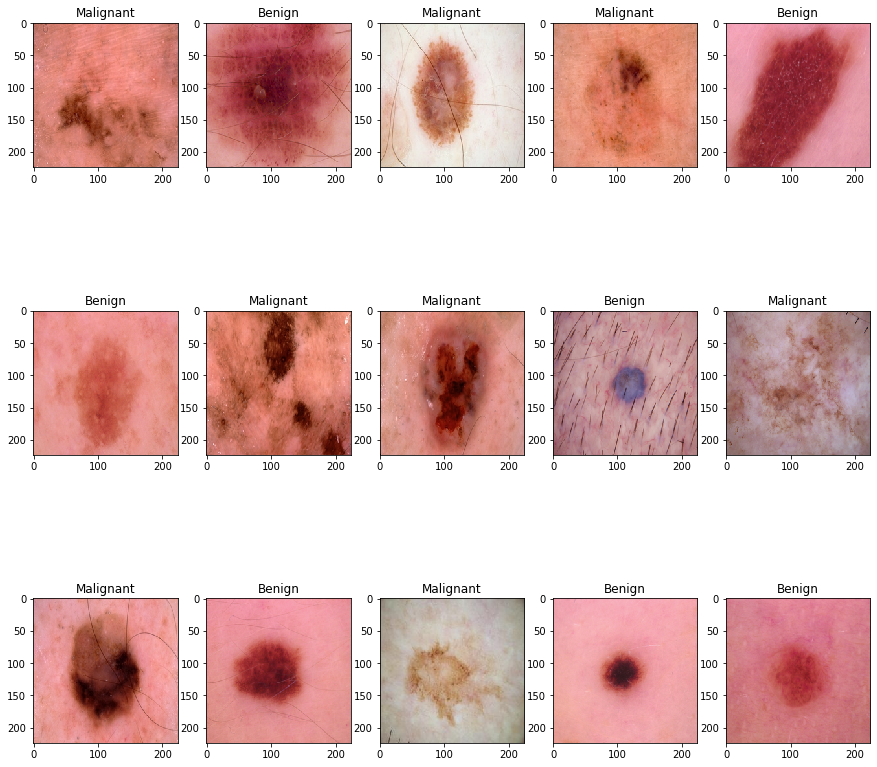

In [2]:
figure = plt.figure(figsize=(15, 15))

columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = figure.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [3]:
#Normalize (Rescale data to same range)
X_train, X_test = X_train/255, X_test/255

In [4]:
#one hot encode the labels
y_train = to_categorical(y_train, num_classes= 2)
y_train

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [5]:
#the model
from keras.applications import InceptionV3
from keras import models, layers

def fine_tuned_inception():
    pt_inception = InceptionV3(
        include_top=False,
        weights='imagenet',
        input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),
    )
    
    for layer in pt_inception.layers[:-4]:
        layer.trainable = False
        
    ft_inception = models.Sequential()
    ft_inception.add(pt_inception)
    ft_inception.add(layers.Flatten())
    ft_inception.add(layers.Dense(1024, activation='relu'))
    ft_inception.add(layers.Dropout(0.8))
    ft_inception.add(layers.Dense(2, activation='softmax'))
    
    return ft_inception